In [1]:
# Import required system
import sys
sys.path.append('/Users/hoto7260/Jacob_LIET2/LIET/liet')

# general
import rnap_lib_plotting as pt
import matplotlib.pyplot as plt
import numpy as np
try:
    np.distutils.__config__.blas_opt_info = np.distutils.__config__.blas_ilp64_opt_info
except Exception:
    pass
import pandas as pd
from scipy.stats import pearsonr
import plotly.express as px

# my modules
from liet_res_class import FitParse
import plotting_funcs as pf
import analysis_funcs as af

# setting plotting paramaters
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
#rcParams['font.size'] = 15
#plt.rcParams.update({'font.size': 22})

## Getting the data into a dataframe from FitParse
Columns of dataframe: 
    - Annotations:              'chrom', 'start', 'stop', 'strand' 
    - Sense Main Priors:        'mL_mean', 'mL_stdev', 'sL_mean','sL_stdev', 'tI_mean', 
                                'tI_stdev', 'mT_mean', 'mT_stdev', 'sT_mean','sT_stdev'
    - Sense Weight Priors:      'w_LI_mean', 'w_LI_stdev', 'w_E_mean', 'w_E_stdev',
                                'w_T_mean', 'w_T_stdev', 'w_B_mean', 'w_B_stdev' 
    - Antisense Main Priors:    'mL_a_mean','mL_a_stdev', 'sL_a_mean', 'sL_a_stdev' 
    - Antisense Weight Priors:  'w_aLI_mean', 'w_aLI_stdev','w_aB_mean', 'w_aB_stdev'
    - Log Info:                 'pos_cov', 'nev_cov', 'total_cov', 'elbo_lrange', 'elbo_urange' 

In [2]:
# initiate FitParse class instance with SRR12083664 that did not include tI_a & sL_a
     # from 9.2
# log_file = "/scratch/Users/hoto7260/batch_out_files/LIETfirstSRRtests/LIETtest_run9.2/SRR12083664.10ksamp2_2_Hope_nomLab.liet.log"
# res_file = "/scratch/Users/hoto7260/batch_out_files/LIETfirstSRRtests/LIETtest_run9.2/SRR12083664.10ksamp2_2_Hope_nomLab.liet"
# srr3664_no = pf.FitParse(res_file=res_file, log_file=log_file)

# initiate FitParse class instance with SRR12083664 that did not include tI_a & sL_a
     # from 10.3
log_file = "/scratch/Users/hoto7260/batch_out_files/LIETfirstSRRtests/LIETtest_run10.3/SRR12083664.10ksamp2_2_Hope_nomLab10.3.liet.log"
res_file = "/scratch/Users/hoto7260/batch_out_files/LIETfirstSRRtests/LIETtest_run10.3/SRR12083664.10ksamp2_2_Hope_nomLab10.3.liet"
srr3664_no2 = pf.FitParse(res_file=res_file, log_file=log_file)
# initiate FitParse class instance with SRR12083664 that included mL_a
#      # from 9.2
# log_file = "/scratch/Users/hoto7260/batch_out_files/LIETfirstSRRtests/LIETtest_run9.2/SRR12083664.10ksamp2_2_Hope_yesmLa.liet.log"
# res_file = "/scratch/Users/hoto7260/batch_out_files/LIETfirstSRRtests/LIETtest_run9.2/SRR12083664.10ksamp2_2_Hope_yesmLa.liet"
# srr3664_yes = pf.FitParse(res_file=res_file, log_file=log_file)
# initiate FitParse class instance with SRR12083664 that did not include tI_a & sL_a
     # from 10.3
log_file = "/scratch/Users/hoto7260/batch_out_files/LIETfirstSRRtests/LIETtest_run10.3/SRR12083664.10ksamp2_2_Hope_yesmLa.liet.log"
res_file = "/scratch/Users/hoto7260/batch_out_files/LIETfirstSRRtests/LIETtest_run10.3/SRR12083664.10ksamp2_2_Hope_yesmLa.liet"
srr3664_yes2 = pf.FitParse(res_file=res_file, log_file=log_file)

## Comparing mT & sigmaT

In [68]:
print(srr3664_no2.df.columns)

Index(['chrom', 'start', 'stop', 'strand', 'gene', 'mL_mean', 'mL_stdev',
       'sL_mean', 'sL_stdev', 'tI_mean', 'tI_stdev', 'mT_mean', 'mT_stdev',
       'sT_mean', 'sT_stdev', 'w_LI_mean', 'w_LI_stdev', 'w_E_mean',
       'w_E_stdev', 'w_T_mean', 'w_T_stdev', 'w_B_mean', 'w_B_stdev',
       'mL_a_mean', 'mL_a_stdev', 'sL_a_mean', 'sL_a_stdev', 'w_aLI_mean',
       'w_aLI_stdev', 'w_aB_mean', 'w_aB_stdev', 'pos_cov', 'neg_cov',
       'elbo_lrange', 'elbo_urange', 'fit_time_min'],
      dtype='object')


Text(0.5, 1.0, 'Comparing mT & sigmaT')

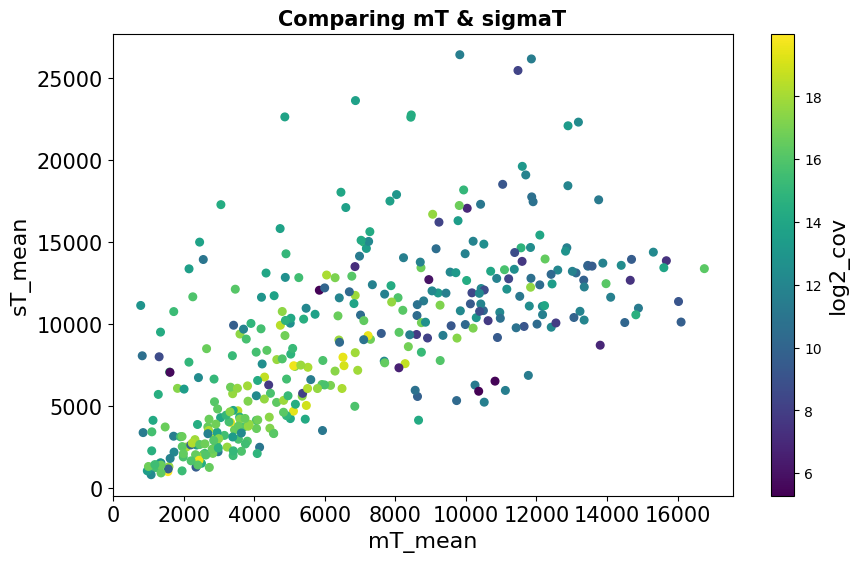

In [71]:
cov_list = []
for gene in srr3664_no2.df.index:
    if srr3664_no2.df.loc[gene]['strand'] == 1:
        cov_list.append(srr3664_no2.df.loc[gene]['pos_cov'])
    elif srr3664_no2.df.loc[gene]['strand'] == -1:
        cov_list.append(abs(srr3664_no2.df.loc[gene]['neg_cov']))
srr3664_no2.df['cov'] = cov_list
srr3664_no2.df['log2_cov'] = np.log2(srr3664_no2.df['cov'])

srr3664_no2.df.plot.scatter('mT_mean', 'sT_mean', 
                         c='log2_cov', colormap='viridis', 
                       s=30, fontsize=15)

plt.title('Comparing mT & sigmaT', weight='bold')

## Calculating Strand Bias
Strand Bias = sense initiation/ total initation
sense initation = w_LI* pos_cov
antisense initation = w_aLI * neg_cov

In [3]:
# Make a new dataframe to hold data
#srr3664_no_SB_df = af.calc_strand_bias(srr3664_no.df)
#srr3664_yes_SB_df = af.calc_strand_bias(srr3664_yes.df)
srr3664_no2_SB_df = af.calc_strand_bias(srr3664_no2.df)
srr3664_yes2_SB_df = af.calc_strand_bias(srr3664_yes2.df)

/Users/hoto7260/Hope_LIET/H_LIET/liet/plotting/analysis_funcs.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sense init'] = df['w_LI_mean']*df['pos_cov']
/Users/hoto7260/Hope_LIET/H_LIET/liet/plotting/analysis_funcs.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['antisense init'] = abs(df['w_aLI_mean']*df['neg_cov'])
/Users/hoto7260/Hope_LIET/H_LIET/liet/plotting/analysis_funcs.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

## Exploratory Graphing of individual runs

In [ ]:
title = "Genes with lowest 50 strand biases towards sense when shared priors for mL_a & mL"
pf.one_df_bar_plotter(x_df=srr3664_no_SB_df.index, y_df=srr3664_no_SB_df['strand bias'], 
                   x_label='gene', y_label='strand bias',
                   custom_segment = ':50:,:', title=title)

title = "Genes with top 50 strand biases towards sense when shared priors for mL_a & mL"
pf.one_df_bar_plotter(x_df=srr3664_no_SB_df.index, y_df=srr3664_no_SB_df['strand bias'], 
                   x_label='gene', y_label='strand bias',
                   custom_segment = '313::,:', title=title)

title = "All genes strand biases towards sense when shared priors for mL_a & mL"
pf.one_df_bar_plotter(x_df=srr3664_no_SB_df.index, y_df=srr3664_no_SB_df['strand bias'], 
                   x_label='gene', y_label='strand bias',
                    title=title)

In [ ]:
title = "Genes with lowest 50 strand biases towards sense when separate priors for mL_a & mL"
pf.one_df_bar_plotter(x_df=srr3664_yes_SB_df.index, y_df=srr3664_no_SB_df['strand bias'], 
                   x_label='gene', y_label='strand bias',
                   custom_segment = ':50:,:', title=title)

title = "Genes with top 50 strand biases towards sense when separate priors for mL_a & mL"
pf.one_df_bar_plotter(x_df=srr3664_yes_SB_df.index, y_df=srr3664_no_SB_df['strand bias'], 
                   x_label='gene', y_label='strand bias',
                   custom_segment = '313::,:', title=title)

title = "All genes strand biases towards sense when separate priors for mL_a & mL"
pf.one_df_bar_plotter(x_df=srr3664_yes_SB_df.index, y_df=srr3664_no_SB_df['strand bias'], 
                   x_label='gene', y_label='strand bias',
                    title=title)

In [ ]:
# Do correlation comparison of w/ & w/o
#dfs = [srr3664_no_SB_df, srr3664_yes_SB_df]
dfs = [srr3664_no2_SB_df, srr3664_yes2_SB_df]
srr3664_no2_SB_df.name = "Shared"
srr3664_yes2_SB_df.name = "Separate"
af.corr_matrix_provider2(dfs, y_value="strand bias", corrtype = 'pearson')
rcParams['figure.figsize'] = 5, 5
rcParams['font.size'] = 9

pf.dataframe_plotter(srr3664_no2_SB_df, srr3664_yes2_SB_df, 
                     y_value="strand bias", 
                     xlabel='Shared', ylabel='Separate', 
                     title='', corr=True)

### Combine all info into a dataframe

In [4]:
# change dataframes so only information of shared genes maintained 
# (for applicable adding of strand bias)
srr3664_yes2_f_df, srr3664_yes2_SB_df= af.df_merger(srr3664_yes2.df, 
                                                      srr3664_yes2_SB_df, 
                                                      name='Strand Bias df')
srr3664_no2_f_df, srr3664_no2_SB_df= af.df_merger(srr3664_no2.df, 
                                                      srr3664_no2_SB_df, 
                                                      name='Strand Bias df')
# add strand bias to each dataframe
srr3664_yes2_f_df['strand bias'] = srr3664_yes2_SB_df['strand bias']
srr3664_no2_f_df['strand bias'] = srr3664_no2_SB_df['strand bias']


After merging Strand Bias df, # genes= 363
After merging Strand Bias df, # genes= 363


In [22]:
print(srr3664_no2_f_df.columns)

Index(['chrom', 'start', 'stop', 'strand', 'gene', 'mL_mean', 'mL_stdev',
       'sL_mean', 'sL_stdev', 'tI_mean', 'tI_stdev', 'mT_mean', 'mT_stdev',
       'sT_mean', 'sT_stdev', 'w_LI_mean', 'w_LI_stdev', 'w_E_mean',
       'w_E_stdev', 'w_T_mean', 'w_T_stdev', 'w_B_mean', 'w_B_stdev',
       'mL_a_mean', 'mL_a_stdev', 'sL_a_mean', 'sL_a_stdev', 'w_aLI_mean',
       'w_aLI_stdev', 'w_aB_mean', 'w_aB_stdev', 'pos_cov', 'neg_cov',
       'elbo_lrange', 'elbo_urange', 'fit_time_min', 'strand bias'],
      dtype='object')


In [23]:
# filter based on w_B_mean
df_list = [srr3664_yes2_f_df, srr3664_no2_f_df]
[srr3664_yes2_f_df, srr36642_no2_f_df] = af.filter_dfs(df_list, 
                                                        col='w_B_mean',
                                                        value=0.6,
                                                        comparison='<')

# then get  combined dataframe for easy scatterplot analysis
col_list = ['gene', 'w_B_mean', 'pos_cov', 'neg_cov', 'strand bias', 
            'mL_mean', 'mL_stdev', 'mL_a_mean', 'mL_a_stdev', 'fit_time_min']
df_list = [srr3664_no2_f_df, srr3664_yes2_f_df]
name_list = ['Shared', 'Separate']
noyes_SB_df = af.df_combiner(col_list, df_list, name_list)


After merging Separate, # genes= 320
After merging Separate, # genes= 320
After merging Separate, # genes= 320
After merging Separate, # genes= 320
After merging Separate, # genes= 320
After merging Separate, # genes= 320
After merging Separate, # genes= 320
After merging Separate, # genes= 320
After merging Separate, # genes= 320
After merging Separate, # genes= 320


## Comparing posterior values between Shared & Separate

#### Get the coverage based on if negative or positive strands

In [24]:
cov_list = []
for gene in noyes_SB_df.index:
    if noyes_SB_df.loc[gene]['strand'] == 1:
        cov_list.append(noyes_SB_df.loc[gene]['Shared_pos_cov'])
    elif noyes_SB_df.loc[gene]['strand'] == -1:
        cov_list.append(abs(noyes_SB_df.loc[gene]['Shared_neg_cov']))
noyes_SB_df['cov'] = cov_list
noyes_SB_df['log2_cov'] = np.log2(noyes_SB_df['cov'])

In [20]:
print(noyes_SB_df.columns)

Index(['gene', 'strand', 'Shared_gene', 'Separate_gene', 'Shared_w_B_mean',
       'Separate_w_B_mean', 'Shared_pos_cov', 'Separate_pos_cov',
       'Shared_neg_cov', 'Separate_neg_cov', 'Shared_strand bias',
       'Separate_strand bias', 'Shared_mL_mean', 'Separate_mL_mean',
       'Shared_mL_stdev', 'Separate_mL_stdev', 'Shared_mL_a_mean',
       'Separate_mL_a_mean', 'Shared_mL_a_stdev', 'Separate_mL_a_stdev', 'cov',
       'log_cov', 'log2_cov'],
      dtype='object')


#### Graph fit times

Index(['gene', 'Shared_gene', 'Separate_gene', 'Sep-Shar_fit_time'], dtype='object')


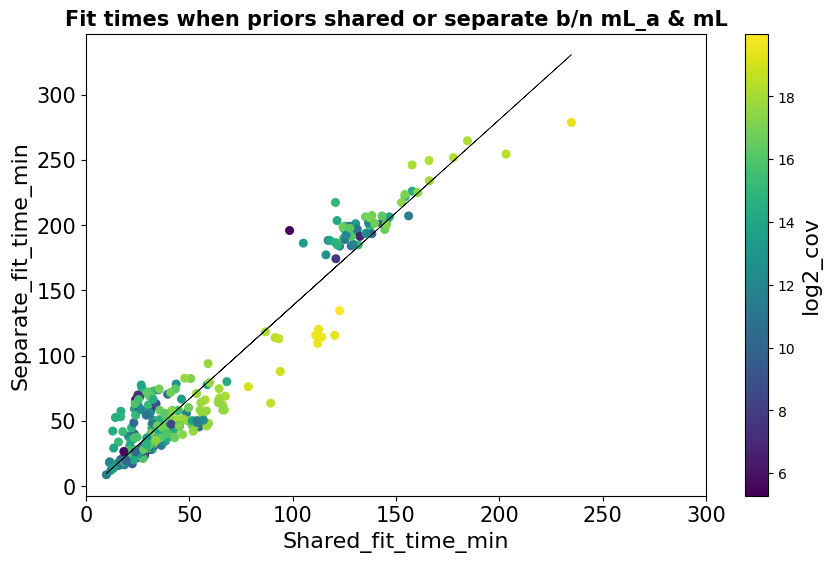

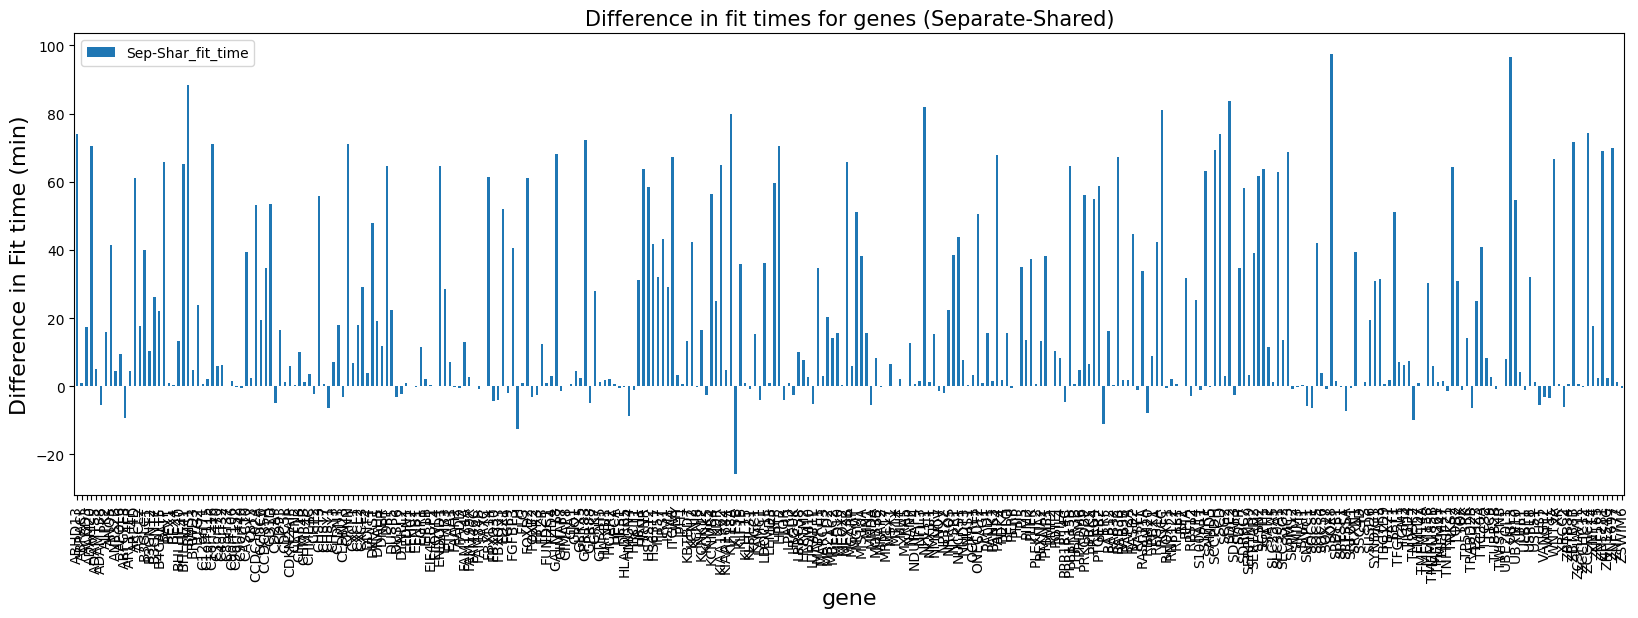

In [66]:
noyes_SB_df.plot.scatter('Shared_fit_time_min', 'Separate_fit_time_min', 
                         c='log2_cov', colormap='viridis', s=30, fontsize=15)
plt.xlim([0, 300])
plt.xlim([0, 300])
#calculate equation for trendline
z = np.polyfit(noyes_SB_df['Shared_fit_time_min'], noyes_SB_df['Separate_fit_time_min'], 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(noyes_SB_df['Shared_fit_time_min'], p(noyes_SB_df['Shared_fit_time_min']),
        color='black', linewidth=0.5)
plt.title('Fit times when priors shared or separate b/n mL_a & mL', weight='bold')

noyes_SB_df["Sep-Shar_fit_time"] = noyes_SB_df['Separate_fit_time_min'] - noyes_SB_df['Shared_fit_time_min']
noyes_SB_ft_df = noyes_SB_df.filter(regex='Sep-Shar_fit_time|gene')
print(noyes_SB_ft_df.columns)
noyes_SB_ft_df.plot(x='gene', kind='bar', stacked=False,
        title='Difference in fit times for genes (Separate-Shared)', 
                    figsize=(20,6), xlabel=None, ylabel='Difference in Fit time (min)')
plt.show()


sum of shared fit time 17204.21
sum of separate fit time 23104.590000000004
1.6389944444444458


Text(0.5, 1.0, 'Fit time difference when priors shared between mL_a & mL: 98 hrs')

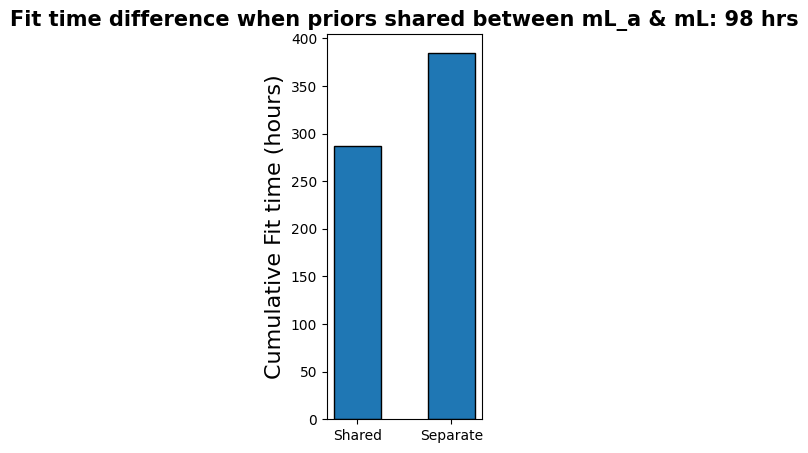

In [62]:
print("sum of shared fit time", noyes_SB_ft_df['Shared_fit_time_min'].sum())
print("sum of separate fit time", noyes_SB_ft_df['Separate_fit_time_min'].sum())
fit = ["Shared", "Separate"]
fittimes = [17204.21/60, 23104.590000000004/60]
print((fittimes[1]-fittimes[0])/60)
plt.figure(figsize=(2,5))
plt.bar(fit, fittimes, width=0.5, align='center', edgecolor='black')
plt.ylabel("Cumulative Fit time (hours)")
plt.title("Fit time difference when priors shared between mL_a & mL: 98 hrs", weight='bold')

#### Graph strand bias

In [ ]:
plt.rcParams["font.family"] = 'DejaVu Sans'

plt.rc('axes', titlesize=15)
plt.rc('axes', labelsize=16)
#plt.title( fontname="Times New Roman", size=28,fontweight="bold")

noyes_SB_df.plot.scatter('Shared_strand bias', 'Separate_strand bias', 
                         c='log2_cov', colormap='viridis', s=30, fontsize=15)
plt.title('Strand bias when priors shared or separate b/n mL_a & mL', weight='bold')

#### Graph posteriors

Text(0.5, 1.0, 'Standard deviation of mLa when priors shared or separate b/n mL_a & mL')

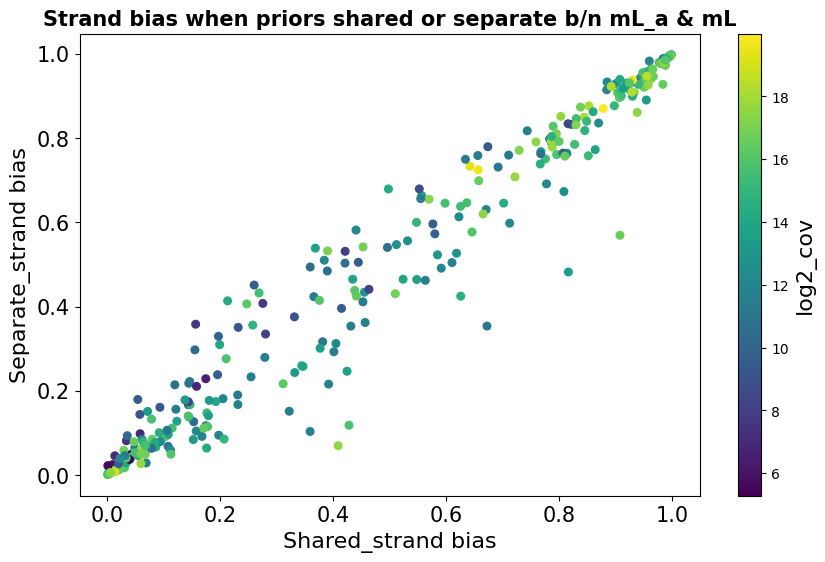

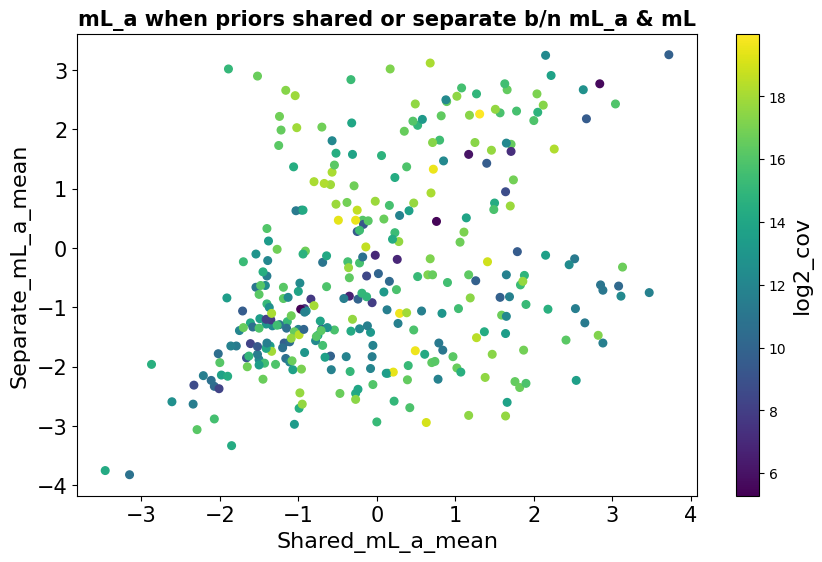

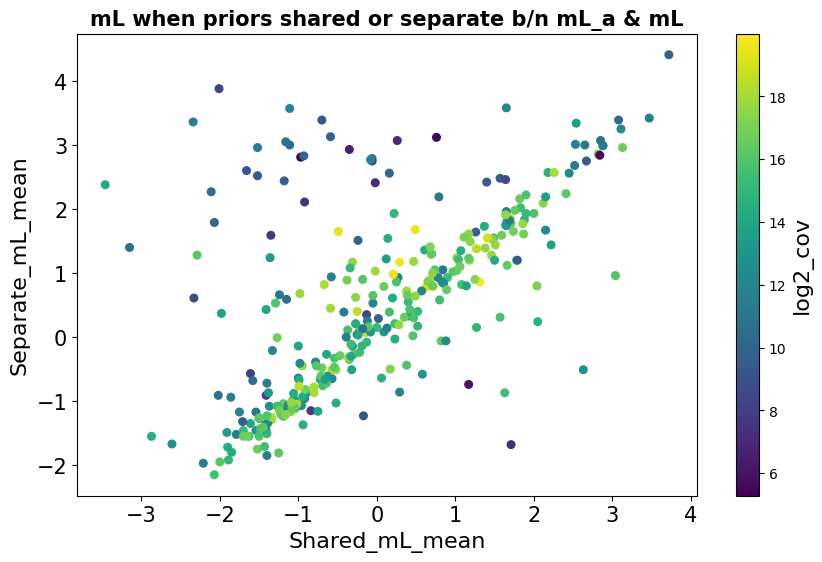

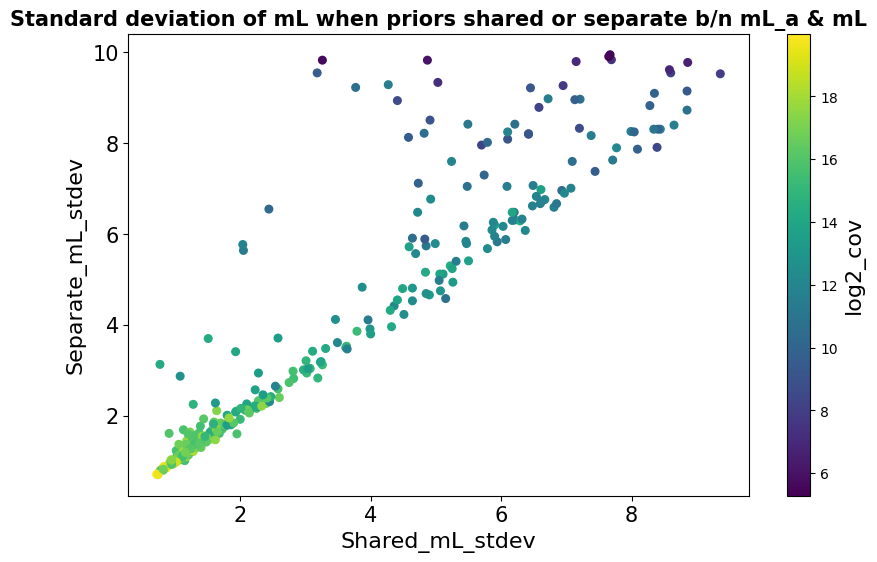

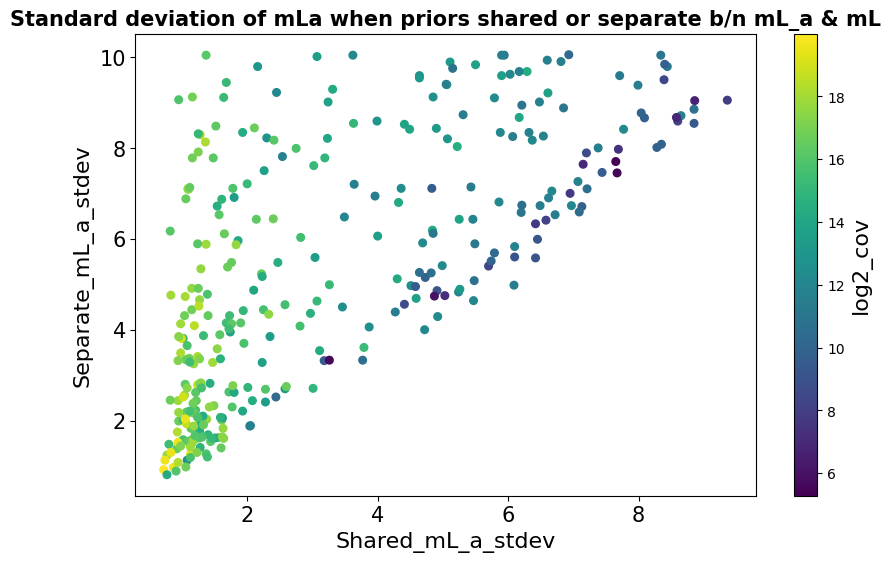

In [19]:
noyes_SB_df.plot.scatter('Shared_mL_a_mean', 'Separate_mL_a_mean', 
                         c='log2_cov', colormap='viridis', s=30, fontsize=15)
plt.title('mL_a when priors shared or separate b/n mL_a & mL', weight='bold')
noyes_SB_df.plot.scatter('Shared_mL_mean', 'Separate_mL_mean', 
                         c='log2_cov', colormap='viridis', s=30, fontsize=15)
plt.title('mL when priors shared or separate b/n mL_a & mL', weight='bold')

noyes_SB_df.plot.scatter('Shared_mL_stdev', 'Separate_mL_stdev', 
                         c='log2_cov', colormap='viridis', s=30, fontsize=15)
plt.title('Standard deviation of mL when priors shared or separate b/n mL_a & mL', weight='bold')
noyes_SB_df.plot.scatter('Shared_mL_a_stdev', 'Separate_mL_a_stdev', 
                         c='log2_cov', colormap='viridis', s=30, fontsize=15)
plt.title('Standard deviation of mLa when priors shared or separate b/n mL_a & mL', weight='bold')

### Graphing using plotxy

In [ ]:
# graph using plotxy
fig = px.scatter(noyes_SB_df, x="Shared_strand bias", y="Separate_strand bias", 
                 color="gene", hover_data = ['Separate_w_B_mean', 
                                             'Separate_pos_cov',
                                             'Separate_neg_cov'],
                title = "Strand bias when separate & shared priors used for mL and mL_a")
fig.show()

In [ ]:
fig = px.scatter(noyes_SB_df, x="Shared_mL_a_mean", y="Separate_mL_a_mean", 
                 color="gene", hover_data = ['Separate_w_B_mean', 
                                             'Separate_pos_cov',
                                             'Separate_neg_cov'],
                title = "mL_a mean when separate & shared priors used for mL and mL_a")
fig.show()

In [ ]:
fig = px.scatter(noyes_SB_df, x="Shared_mL_mean", y="Separate_mL_mean", 
                 color="gene", hover_data = ['Separate_w_B_mean', 
                                             'Separate_pos_cov',
                                             'Separate_neg_cov'],
                title = "mL when separate & shared priors used for mL and mL_a")
fig.show()

In [ ]:
fig = px.scatter(noyes_SB_df, x="Shared_mL_a_stdev", y="Separate_mL_a_stdev", 
                 color="gene", hover_data = ['Separate_w_B_mean', 
                                             'Separate_pos_cov',
                                             'Separate_neg_cov'],
                title = "mL_a stdev when separate & shared priors used for mL and mL_a")
fig.show()
fig = px.scatter(noyes_SB_df, x="Shared_mL_stdev", y="Separate_mL_stdev", 
                 color="gene", hover_data = ['Separate_w_B_mean', 
                                             'Separate_pos_cov',
                                             'Separate_neg_cov'],
                title = "mL stdev when separate & shared priors used for mL and mL_a")
fig.show()

## Compare among cell types
See if strand bias of the **same genes** changes based on cell type?
Is strand bias a consistent thing or does it change based on how well the transcript is transcribed? If it is consistent, it would indicate the bidirectionals might be playing a role or the noise is unavoidable. If it is not, it indicates that RNA polymerase is being better situated for transcription.
1. Graph within same cell type
2. Graph between different cell types